# Voting Classifier

In [1]:
# Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import VotingClassifier

from sklearn.metrics import classification_report

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


## Data

In [2]:
wine=pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [3]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [5]:
wine['alcohol']=wine['alcohol'].fillna(wine['alcohol'].mean())

In [6]:
wine['label']=np.where(wine['quality']>6,1,0)

In [7]:
wine['label'].value_counts()

0    422
1     98
Name: label, dtype: int64

In [8]:
x=wine[['alcohol','density']]
y=wine['label']

## Data Splitting

In [9]:
x_train, x_test, y_train, y_test= train_test_split(x,y, stratify=y, test_size=0.2, random_state=2020)

## Base Learner: basic

In [10]:
models= {
    'logistic regression': LogisticRegression(),
    'KNN':KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(max_depth=5)
}

In [11]:
for i,j in models.items():
    j.fit(x_train,y_train)
    y_pred= j.predict(x_test)
    print(i)
    print(classification_report(y_test,y_pred))

logistic regression
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        84
           1       0.75      0.45      0.56        20

    accuracy                           0.87       104
   macro avg       0.82      0.71      0.74       104
weighted avg       0.86      0.87      0.85       104

KNN
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        84
           1       0.75      0.75      0.75        20

    accuracy                           0.90       104
   macro avg       0.85      0.85      0.85       104
weighted avg       0.90      0.90      0.90       104

Decision Tree
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98   

## Voting Classifier: Basic

In [12]:
lr=LogisticRegression()
knn=KNeighborsClassifier(n_neighbors=3)
dt=DecisionTreeClassifier(max_depth=5)

In [13]:
vc=VotingClassifier([
    ('model1', lr),
    ('model2', knn),
    ('model3', dt)
])

In [14]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('model1', LogisticRegression()),
                             ('model2', KNeighborsClassifier(n_neighbors=3)),
                             ('model3', DecisionTreeClassifier(max_depth=5))])

In [15]:
y_pred=vc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        84
           1       1.00      0.80      0.89        20

    accuracy                           0.96       104
   macro avg       0.98      0.90      0.93       104
weighted avg       0.96      0.96      0.96       104



overall hasil voting classifier sudah cukup bagus, walaupun tidak sebaik decision tree.

## Base Learners: Improved

In [16]:
lr=LogisticRegression(solver='liblinear', C=0.01)
poly= PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
lr_pipe= Pipeline([
    ('poly', poly),
    ('model', lr)
])

In [18]:
knn= KNeighborsClassifier(n_neighbors=3)
knn_pipe=Pipeline([
    ('scaling',StandardScaler()),
    ('model',knn)
])

In [19]:
dt= DecisionTreeClassifier(max_depth=5)

In [20]:
models={
    'logreg':lr_pipe,
    'KNN':knn_pipe,
    'DT':dt
}

In [22]:
for i,j in models.items():
    j.fit(x_train,y_train)
    y_pred=j.predict(x_test)
    print(i)
    print(classification_report(y_test,y_pred))

logreg
              precision    recall  f1-score   support

           0       0.88      0.96      0.92        84
           1       0.75      0.45      0.56        20

    accuracy                           0.87       104
   macro avg       0.82      0.71      0.74       104
weighted avg       0.86      0.87      0.85       104

KNN
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        84
           1       0.95      0.95      0.95        20

    accuracy                           0.98       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.98      0.98      0.98       104

DT
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98      0.98       104



nilai evaluasi KNN meningkat jauh. mari kita lihat apakah peningkatan ini berpengaruh terhadap performa voting classifier.

## Voting Classifier: Improved

In [23]:
lr=LogisticRegression(solver='liblinear', C=0.01)
poly= PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
lr_pipe= Pipeline([
    ('poly', poly),
    ('model', lr)
])

In [24]:
knn= KNeighborsClassifier(n_neighbors=3)
knn_pipe=Pipeline([
    ('scaling',StandardScaler()),
    ('model',knn)
])

In [25]:
dt=DecisionTreeClassifier(max_depth=5)

In [26]:
vc=VotingClassifier([
    ('model 1', lr_pipe),
    ('model 2', knn_pipe),
    ('model 3', dt)
])

In [27]:
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('model 1',
                              Pipeline(steps=[('poly',
                                               PolynomialFeatures(degree=3,
                                                                  include_bias=False)),
                                              ('model',
                                               LogisticRegression(C=0.01,
                                                                  solver='liblinear'))])),
                             ('model 2',
                              Pipeline(steps=[('scaling', StandardScaler()),
                                              ('model',
                                               KNeighborsClassifier(n_neighbors=3))])),
                             ('model 3', DecisionTreeClassifier(max_depth=5))])

In [28]:
y_pred=vc.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        84
           1       1.00      0.90      0.95        20

    accuracy                           0.98       104
   macro avg       0.99      0.95      0.97       104
weighted avg       0.98      0.98      0.98       104



Pada voting classifier, peningkatan performa base learners bisa meningkatkan performa model

In [30]:
# vc.get_params()

# Random Forest

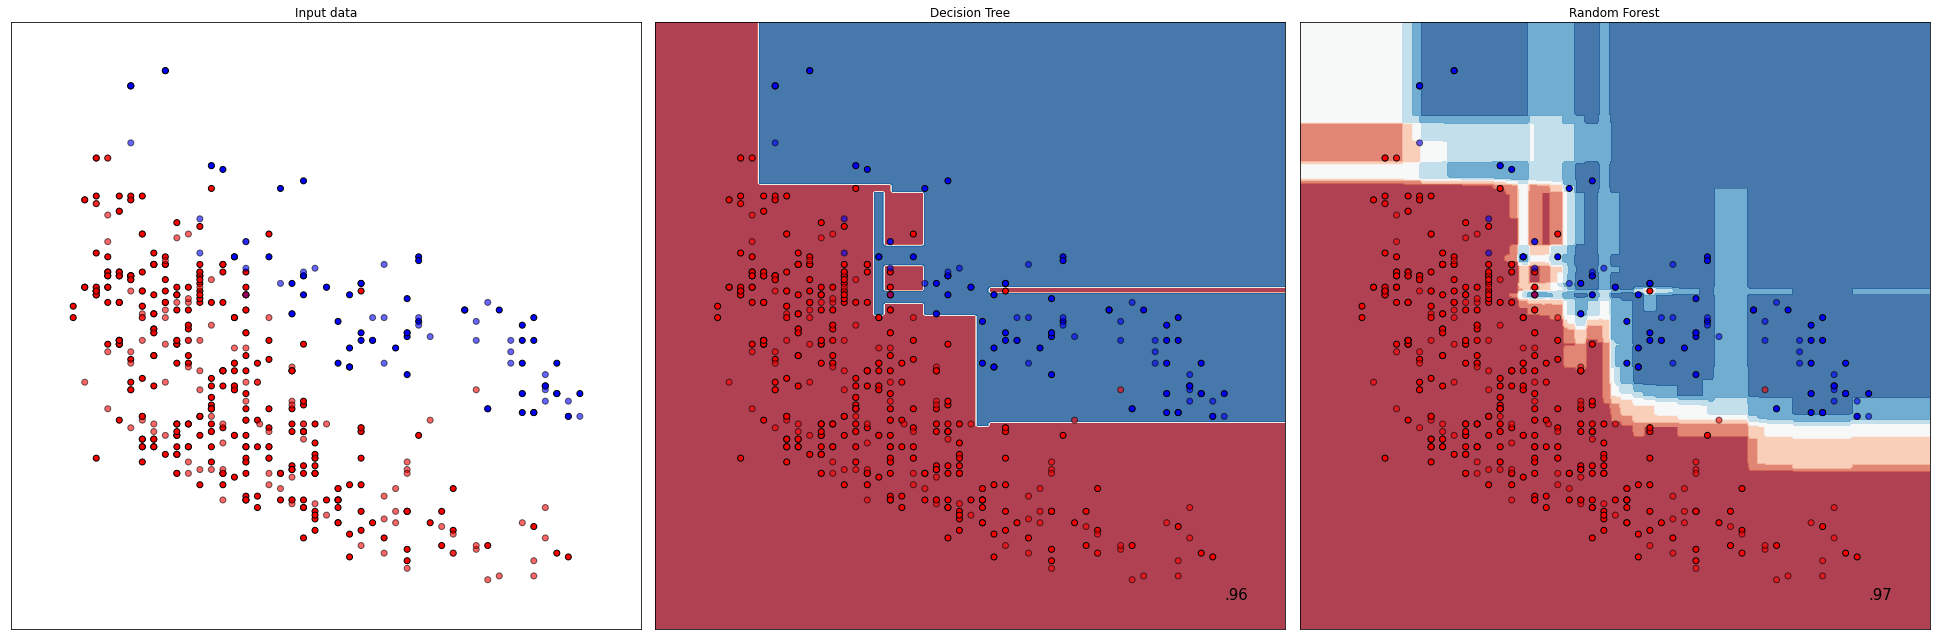

In [31]:
## Desicion Boundary ilustration
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

h = .02  # step size in the mesh

names = ["Decision Tree", "Random Forest"]

classifiers = [
    DecisionTreeClassifier(), # you can add more model
    RandomForestClassifier(n_estimators=20)]

X = wine[['alcohol','density']]
y = wine['label']
linearly_separable = (X, y)

datasets = [
            linearly_separable # you can add more dataset
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

## Data

In [33]:
bankloan= pd.read_csv('bankloan.csv')

In [35]:
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [36]:
x=bankloan[['employ','debtinc','creddebt','othdebt']]
y=bankloan['default']

## Splitting

In [38]:
x_train,x_test, y_train, y_test= train_test_split(x,y, stratify=y, test_size=0.2, random_state=2020)

## Random Forest vs Decision Tree

In [39]:
dt= DecisionTreeClassifier(max_depth=3)
rf= RandomForestClassifier(max_depth=3, n_estimators=20, max_features=4) #n estimator= berapa pohon yang mau dibuat
# max features: jumlah feature yang diambil secara acak setiap bootstrap

In [41]:
models=[dt, rf]
score=[]
mean_score=[]
std_score=[]

for i in models:
    model_cv= cross_val_score(i,x_train,y_train, scoring='f1')
    score.append(model_cv)
    mean_score.append(model_cv.mean())
    std_score.append(model_cv.std())
    
pd.DataFrame({
    'model':['dt','rf'],
    'mean':mean_score,
    'std':std_score
})

,model,mean,std
0,dt,0.478882,0.216009
1,rf,0.542035,0.091875


bisa dilihat bahwa performa random forest lebih baik dan lebih stabil dibandingkan dengan decision tree pada kasus ini.

## Performa RF pada Data Test

In [42]:
rf= RandomForestClassifier(max_depth=3, n_estimators=20, max_features=4)
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       103
           1       0.65      0.35      0.46        37

    accuracy                           0.78       140
   macro avg       0.73      0.64      0.66       140
weighted avg       0.76      0.78      0.75       140



In [43]:
pd.DataFrame({'imp': rf.feature_importances_}, index=list(x))

,imp
employ,0.250538
debtinc,0.523746
creddebt,0.201316
othdebt,0.024400


In [57]:
dt=DecisionTreeClassifier(max_depth=3)
dt.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3)

In [58]:
pd.DataFrame({'imp': dt.feature_importances_}, index= list(x))

,imp
employ,0.322462
debtinc,0.518914
creddebt,0.158624
othdebt,0.000000


In [59]:
# feature importance antara dt dan rf berbeda

In [60]:
from sklearn.tree import plot_tree

In [61]:
# plot_tree(rf) #error
# rf tidak bisa plotting pohon

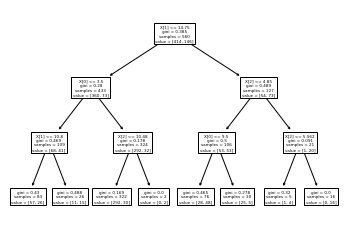

In [62]:
plot_tree(dt)
plt.show()

# Latihan

Dengan menggunakan data titanic:  
* x= *sex*, age, fare, *class*, *embark_town*, *alone*  
* y= survived
* test size 0.2
* random state 2020


Dan skema preprocesing berikut:
* simple imputer most frequent: embark town
* simple imputer median: age
* onehot: sex, embark town, alone  
* ordinal: class  

Coba bandingkan performa model DT dan RF. (cv)  

Apapun hasilnya, coba lakukan hyperparameter tunning pada model RF untuk meningkat performa model RF.  
Jangan lupa gunakan pipeline!